
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Thursday, April 5th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

## Name: Chia-Ju Chen
## UT EID: cc65542

## Name: Minke Cheng
## UT EID: mc65568

### Note: Q1 and Q3 may take a long time to run (a few hours). It will be more convenient if you run them on a powerful machine. Of course, this is also a good opportunity to use the Azure cloud.

# Question 1:  2 class Classification (30 pts)

In this problem, you will evaluate the performance of 6 classifiers in classifying signal vs background in the MAGIC Gamma Telescope Data Set. The data has been split into training and test as well as standardized for you. 
You will train the following models on this dataset:

1. Gaussian Naive Bayes (http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
2. Linear Discriminant Analysis (http://scikit-learn.org/stable/modules/lda_qda.html)
3. Quadratic Discriminant Analysis
4. Logistic Regression (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)
5. Linear SVM (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
6. Radial Basis Function SVM. 

For Logistic Regression, you will have to run kFold cross validation with 5 folds to get the best value of C. C is the inverse of the regularization hyper-parameter.
For SVM (linear and rbf), you will use GridSearchCV (http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) with cv set to 5, to identify the correct value of C. Use `Cs = 10**np.linspace(-2, 2, 10)` as the range of C for SVM gridsearch

Note: Maintain all other parameters at their default settings.

The deliverables for this Problem are the following:
1. Use cross validation to find the best C for logistic regression, linear SVM and rbf SVM. (C means different things for each of the models. Please refer the documentation of each API in sklearn for this) (9 points - 3 points per model)
2. Report the Mean Error Rate = (1 - model_score) for each of these 3 models. (9 points - 3 points per model)
3. Train all 6 models using the best C for logistic regression, linear SVM and rbf SVM. Plot the ROC curve for each of these in one figure. Report the area under the curve (AUC) and accuracy for all 6. (12 points)

Note: SVM by default only learns a decision function. In order to obtain ROC curve, you will need prediction probabilities as well. This will require you to set probability=True when training SVM models.

Note: It is a good idea to measure the time taken to run the fit function for each hyperparameter setting to estimate the time for gridSearchCv on a range of hyperparameters.

In [6]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load data
# train
train = pd.read_csv('magic_train.csv', header=None)
y_train = train.values[:,10]
y_train[y_train == 'g'] = 0
y_train[y_train == 'h'] = 1
y_train = y_train.astype(float)
X_train = train.values[:,:10]

# test
test = pd.read_csv('magic_test.csv', header=None)
y_test = test.values[:,10]
y_test[y_test == 'g'] = 0
y_test[y_test == 'h'] = 1
y_test = y_test.astype(float)
X_test = test.values[:,:10]

# standardize the data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

/home/cmk13/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### 1

In [8]:
# To find the best C for logistc regression
kf = KFold(n_splits = 5)
LR = LogisticRegressionCV(cv=kf)

LR.fit(X_train, y_train)

print("Best C for logistic regression: " + str(LR.C_[0]))

Best C for logistic regression: 2.782559402207126


In [9]:
parameters = {'C':10**np.linspace(-2, 2, 10)}
svc = SVC(kernel='linear')
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
print("Best C for linear SVM: " + str(clf.best_params_['C']))

Best C for linear SVM: 0.027825594022071243


In [11]:
parameters_rbf = {'C':10**np.linspace(-2, 2, 10)}
svc_rbf = SVC(kernel='rbf')
clf_rbf = GridSearchCV(svc_rbf, parameters_rbf, cv=5)
clf_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
print("Best C for rbf SVM: " + str(clf_rbf.best_params_['C']))

Best C for rbf SVM: 100.0


### 2

In [13]:
print("Mean Error Rate for logistic regression is: " + str(1 - LR.score(X_test, y_test)))

svc_Linear = SVC(kernel='linear', C=clf.best_params_['C'])
svc_Linear.fit(X_train, y_train)
print("Mean Error Rate for linear SVM is: " + str(1 - svc_Linear.score(X_test, y_test)))

svc_RBF = SVC(kernel='rbf', C=clf_rbf.best_params_['C'])
svc_RBF.fit(X_train, y_train)
print("Mean Error Rate for rbf SVM is: " + str(1 - svc_RBF.score(X_test, y_test)))

Mean Error Rate for logistic regression is: 0.20376831821353802
Mean Error Rate for linear SVM is: 0.20219818562456382
Mean Error Rate for rbf SVM is: 0.1292742498255408


### 3

In [24]:
clf_GNB = GaussianNB()
clf_GNB.fit(X_train, y_train)
y_GNB_predict = clf_GNB.predict_proba(X_test)
fpr_GNB, tpr_GNB, thresholds_GNB = roc_curve(y_test, y_GNB_predict[:,1])
AUC_GNB = roc_auc_score(y_test, y_GNB_predict[:,1])

In [25]:
clf_LDA = LDA()
clf_LDA.fit(X_train, y_train)
y_LDA_predict = clf_LDA.predict_proba(X_test)
fpr_LDA, tpr_LDA, thresholds_LDA = roc_curve(y_test, y_LDA_predict[:,1])
AUC_LDA = roc_auc_score(y_test, y_LDA_predict[:,1])

In [26]:
clf_QDA = QDA()
clf_QDA.fit(X_train, y_train)
y_QDA_predict = clf_QDA.predict_proba(X_test)
fpr_QDA, tpr_QDA, thresholds_QDA = roc_curve(y_test, y_QDA_predict[:,1])
AUC_QDA = roc_auc_score(y_test, y_QDA_predict[:,1])

In [29]:
y_LR_predict = LR.predict_proba(X_test)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_LR_predict[:,1])
AUC_LR = roc_auc_score(y_test, y_LR_predict[:,1])

In [30]:
clf_Linear_SVC = SVC(kernel='linear', C=clf.best_params_['C'], probability=True)
clf_Linear_SVC.fit(X_train, y_train)
y_Linear_SVC_predict = clf_Linear_SVC.predict_proba(X_test)
fpr_Linear_SVC, tpr_Linear_SVC, thresholds_Linear_SVC = roc_curve(y_test, y_Linear_SVC_predict[:,1])
AUC_Linear_SVC = roc_auc_score(y_test, y_Linear_SVC_predict[:,1])

In [31]:
clf_RBF_SVC = SVC(kernel='rbf', C=clf_rbf.best_params_['C'], probability=True)
clf_RBF_SVC.fit(X_train, y_train)
y_RBF_SVC_predict = clf_RBF_SVC.predict_proba(X_test)
fpr_RBF_SVC, tpr_RBF_SVC, thresholds_RBF_SVC = roc_curve(y_test, y_RBF_SVC_predict[:,1])
AUC_RBF_SVC = roc_auc_score(y_test, y_RBF_SVC_predict[:,1])

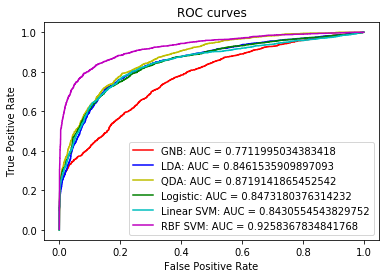

AUC for GNB model:  0.7711995034383418
AUC for LDA model:  0.8461535909897093
AUC for QDA model:  0.8719141865452542
AUC for Logistic Regression model:  0.8473180376314232
AUC for linear SVM model:  0.8430554543829752
AUC for RBF SVM model:  0.9258367834841768


Accuracy for GNB model:  0.7316817864619679
Accuracy for LDA model:  0.7885554780181437
Accuracy for QDA model:  0.7864619678995115
Accuracy for Logistic Regression model:  0.796231681786462
Accuracy for linear SVM model:  0.7978018143754362
Accuracy for RBF SVM model:  0.8707257501744592


In [39]:
GNB_plot, = plt.plot(fpr_GNB, tpr_GNB, 'r', label="GNB: AUC = " + str(AUC_GNB))
LDA_plot, = plt.plot(fpr_LDA, tpr_LDA, 'b', label="LDA: AUC = " + str(AUC_LDA))
QDA_plot, = plt.plot(fpr_QDA, tpr_QDA, 'y', label="QDA: AUC = " + str(AUC_QDA))
LR_plot, = plt.plot(fpr_LR, tpr_LR, 'g', label="Logistic: AUC = " + str(AUC_LR))
Linear_plot, = plt.plot(fpr_Linear_SVC, tpr_Linear_SVC, 'c', label="Linear SVM: AUC = " + str(AUC_Linear_SVC))
RBF_plot, = plt.plot(fpr_RBF_SVC, tpr_RBF_SVC, 'm', label="RBF SVM: AUC = " + str(AUC_RBF_SVC))

plt.legend(handles=[GNB_plot, LDA_plot, QDA_plot, LR_plot, Linear_plot, RBF_plot])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.show()

print("AUC for GNB model: ", AUC_GNB)
print("AUC for LDA model: ", AUC_LDA)
print("AUC for QDA model: ", AUC_QDA)
print("AUC for Logistic Regression model: ", AUC_LR)
print("AUC for linear SVM model: ", AUC_Linear_SVC)
print("AUC for RBF SVM model: ", AUC_RBF_SVC)
print("\n")
print("Accuracy for GNB model: ", clf_GNB.score(X_test, y_test))
print("Accuracy for LDA model: ", clf_LDA.score(X_test, y_test))
print("Accuracy for QDA model: ", clf_QDA.score(X_test, y_test))
print("Accuracy for Logistic Regression model: ", LR.score(X_test, y_test))
print("Accuracy for linear SVM model: ", clf_Linear_SVC.score(X_test, y_test))
print("Accuracy for RBF SVM model: ", clf_RBF_SVC.score(X_test, y_test))

# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

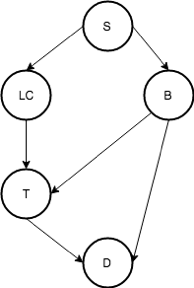

In [1]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

# Answer
### (a)  
Firstly, we have:  
$$
\begin{align}
\\
Pr(B = yes) & = Pr(B = yes | S = yes) \cdot Pr(S = yes) + Pr(B = yes | S = no) \cdot Pr(S = no) \\
& = 0.06 * 0.1 + 0.02 * 0.9 \\
& = 0.024
\end{align}
\\
$$
$$
\begin{align}
Pr(LC = yes) & = Pr(LC = yes | S = yes) \cdot Pr(S = yes) + Pr(LC = yes | S = no) \cdot Pr(S = no) \\
& = 0.03 * 0.1 + 0.01 * 0.9 \\
& = 0.012
\end{align}
$$

Then, we can get:  
$$
\begin{align}
\\
Pr(T = yes | B = yes) & = Pr(T = yes | LC = yes, B = yes) \cdot Pr(LC = yes) + Pr(T = yes | LC = no, B = yes) \cdot Pr(LC = no)\\ 
& = 0.8 * 0.012 + 0.1 * 0.988 \\
& = 0.1084
\end{align} \\
$$
$$
\begin{align}
Pr(T = yes | B = no) & = Pr(T = yes | LC = yes, B = no) \cdot Pr(LC = yes) + Pr(T = yes | LC = no, B = no) \cdot Pr(LC = no)\\ 
& = 0.5 * 0.012 + 0.04 * 0.988 \\
& = 0.04552
\end{align} \\
$$
$$
\begin{align}
Pr(T = no | B = yes) & = Pr(T = no | LC = yes, B = yes) \cdot Pr(LC = yes) + Pr(T = no | LC = no, B = yes) \cdot Pr(LC = no)\\ 
& = 0.2 * 0.012 + 0.9 * 0.988 \\
& = 0.8916
\end{align} \\
$$
$$
\begin{align}
Pr(T = no | B = no) & = Pr(T = no | LC = yes, B = no) \cdot Pr(LC = yes) + Pr(T = no | LC = no, B = no) \cdot Pr(LC = no)\\ 
& = 0.5 * 0.012 + 0.96 * 0.988 \\
& = 0.95448
\end{align} \\
$$

Based on the results above, we have:  
$$
\begin{align}
\\
Pr(T = yes , B = yes) & = Pr(T = yes | B = yes) \cdot Pr(B = yes) \\
& = 0.1084 * 0.024 \\
& = 2.6016 \times 10^{-3}
\end{align} \\
$$
$$
\begin{align}
Pr(T = yes , B = no) & = Pr(T = yes | B = no) \cdot Pr(B = no) \\
& = 0.04552 * 0.976 \\
& = 0.04442752
\end{align} \\
$$
$$
\begin{align}
Pr(T = no , B = yes) & = Pr(T = no | B = yes) \cdot Pr(B = yes) \\
& = 0.8916 * 0.024 \\
& = 0.0213984
\end{align} \\
$$
$$
\begin{align}
Pr(T = no , B = no) & = Pr(T = no | B = no) \cdot Pr(B = no) \\
& = 0.95448 * 0.976 \\
& = 0.93157248
\end{align} \\
$$

So, we can get:  
$$
\begin{align}
Pr(D = yes) = \ & Pr(D = yes | T = yes, B = yes) * Pr(T = yes, B = yes) + \\
& Pr(D = yes | T = yes, B = no) * Pr(T = yes, B = no) + \\
& Pr(D = yes | T = no, B = yes) * Pr(T = no, B = yes) + \\
& Pr(D = yes | T = no, B = no) * Pr(T = no, B = no) \\
= \ & 0.9 * 0.0026016 + 0.7 * 0.04442752 + 0.65 * 0.0213984 + 0.015 * 0.93157248 \\
= \ & 0.0613232512
\end{align}
$$

### (b)
Firstly, we know LC is independent with B with condition S, so we have:  
$$
\begin{align}
\\
Pr(LC = no, B = yes) = & \ Pr(LC = no | S = yes) \cdot Pr(B = yes | S = yes) \cdot Pr(S = yes) +\\
& \ Pr(LC = no | S = no) \cdot Pr(B = yes | S = no) \cdot Pr(S = no) \\
= & \ 0.97 * 0.06 * 0.1 + 0.99 * 0.02 * 0.9 \\
= & \ 0.02364
\end{align} \\
$$

Then we calculate the following:  
$$
\begin{align}
\\
Pr(D = yes | LC = no, B = yes) = & \ Pr(D = yes | T = yes, B = yes) * Pr(T = yes| LC = no, B = yes) + \\
& \ Pr(D = yes | T = no, B = yes) * Pr(T = no| LC = no, B = yes) \\
= & \ 0.9 * 0.1 + 0.65 * 0.9 \\
= & \ 0.675
\end{align}
$$

Now, we calculate the final result of the target probability:  
$$
\begin{align}
\\
Pr(LC = no, B = yes, D = yes) = & \ Pr(D = yes | LC = no, B = yes) \cdot Pr(LC = no, B = yes) \\
= & \ 0.675 * 0.02364 \\
= & \ 0.015957
\end{align}
$$

### (C)
The target probability can be written as:
$$Pr(D = yes | B = yes, LC = no)$$

The value of it has been calaulated above in (b), which is 0.675.

### (d)
The target probability can be written as:
$$Pr(T = yes | S = yes)$$
  
LC and B are independent with each other when given S. Based on what we are given, we get:  
$$
\begin{align}\\
Pr(LC = yes, B = yes | S = yes) = & \ Pr(LC = yes | S = yes) \cdot Pr(B = yes | S = yes) \\
= & \ 0.03 * 0.06 \\
= & \ 0.0018
\end{align} \\
$$
$$
\begin{align}
Pr(LC = yes, B = no | S = yes) = & \ Pr(LC = yes | S = yes) \cdot Pr(B = no | S = yes) \\
= & \ 0.03 * 0.94 \\
= & \ 0.0282
\end{align} \\
$$
$$
\begin{align}
Pr(LC = no, B = yes | S = yes) = & \ Pr(LC = no | S = yes) \cdot Pr(B = yes | S = yes) \\
= & \ 0.97 * 0.06 \\
= & \ 0.0582
\end{align} \\
$$
$$
\begin{align}
Pr(LC = no, B = no | S = yes) = & \ Pr(LC = no | S = yes) \cdot Pr(B = no | S = yes) \\
= & \ 0.97 * 0.94 \\
= & \ 0.9118
\end{align} \\
$$

So the target probability should be:  
$$
\begin{align} \\
Pr(T = yes | S = yes) = & \ Pr(T = yes | LC = yes, B = yes) \cdot Pr(LC = yes, B = yes | S = yes) + \\
& \ Pr(T = yes | LC = yes, B = no) \cdot Pr(LC = yes, B = no | S = yes) + \\
& \ Pr(T = yes | LC = no, B = yes) \cdot Pr(LC = no, B = yes | S = yes) + \\
& \ Pr(T = yes | LC = no, B = no) \cdot Pr(LC = no, B = no | S = yes) \\
= & \ 0.8 * 0.0018 + 0.5 * 0.0282 + 0.1 * 0.0582 + 0.04 * 0.9118 \\
= & \ 0.057832
\end{align}
$$

# Question 3: (15 pts)

In this problem we will be classifying data in the CIFAR-10 dataset which contains 60000 images classified in 10 mutually exclusive classes. Please download and extract the data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

For parts 1-3 we will build a classifier to determine whether an image is in class 0 or class 1. In part 4, we will classify the imges into any of 10 classes. We've included starter code to load the data from the unzipped folder.

1. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
2. Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
3. Repeat question 2 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (3pts)
4. Using the optimal regularization parameter obtained in step 2, train a logistic regression classifier with ridge penalty to clasify $\textbf{all 10 digits}$ (digits 0,1,2,3,...9) of the MNIST dataset.  Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import _pickle as cPickle
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def unpickle(path):
    with open(path, 'rb') as fo:
      data = cPickle.load(fo, encoding='latin1')
    return data

def load_data(path, test=False):
    data = []
    labels = []
    if test:
        batch = unpickle(path + '/test_batch')
        data = batch['data']
        labels = batch['labels']
    else:
        for batch_num in range(1, 5):
            batch = unpickle(path + '/data_batch_' + str(batch_num))
            if len(data) == 0: 
                data = batch['data']
            else:
                data = np.concatenate([data, batch['data']], axis=0)
            labels += batch['labels']
    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [2]:
all_train_data, all_train_labels = load_data('./cifar-10-batches-py')
all_test_data, all_test_labels = load_data('./cifar-10-batches-py', test=True)

two_class_train_data = all_train_data[(all_train_labels == 0) | (all_train_labels == 1)]
two_class_train_labels = all_train_labels[(all_train_labels == 0) | (all_train_labels == 1)]

two_class_test_data = all_test_data[(all_test_labels == 0) | (all_test_labels == 1)]
two_class_test_labels = all_test_labels[(all_test_labels == 0) | (all_test_labels == 1)]

X_train = (two_class_train_data / 255.)
y_train = two_class_train_labels

X_test = (two_class_test_data / 255.)
y_test = two_class_test_labels

In [3]:
y_test.shape

(2000,)

In [4]:
X_train = X_train[np.array(range(0, 7972, 10))]
y_train = y_train[np.array(range(0, 7972, 10))]

X_test = X_test[np.array(range(0, 2000, 10))]
y_test = y_test[np.array(range(0, 2000, 10))]

# Answer
### 1

In [5]:
logistic_model = LogisticRegression(penalty='l2',C=1000000)
logistic_model.fit(X_train, y_train)

y_predict = logistic_model.predict(X_test)
con_matrix = confusion_matrix(y_test, y_predict)

accuracy_y0 = np.sum([(y_predict[i] == 0) & (y_test[i] == 0) for i in range(len(y_test))]) / np.sum(y_test == 0)
accuracy_y1 = np.sum([(y_predict[i] == 1) & (y_test[i] == 1) for i in range(len(y_test))]) / np.sum(y_test == 1)

ERR = (con_matrix[0][1] + con_matrix[1][0]) / np.sum(con_matrix)
ACC = 1 - ERR

print("The confusion matrix is: ")
print(con_matrix)
print("Accuracy for the \"y = 0\" class: ", accuracy_y0)
print("Accuracy for the \"y = 1\" class: ", accuracy_y1)
print("Average per-class accuracy on the test data is: ", ACC)

The confusion matrix is: 
[[78 17]
 [30 75]]
Accuracy for the "y = 0" class:  0.8210526315789474
Accuracy for the "y = 1" class:  0.7142857142857143
Average per-class accuracy on the test data is:  0.765


### 2

In [6]:
from sklearn.metrics import make_scorer

def my_custom_scorer(y_test, y_predict):
    con_matrix = confusion_matrix(y_test, y_predict)
    ERR = (con_matrix[0][1] + con_matrix[1][0]) / np.sum(con_matrix)
    ACC = 1 - ERR
    return ACC

custom_score = make_scorer(my_custom_scorer, greater_is_better=True)
parameters_LR = {'C':[0.01, 0.1, 1, 10 ,100]}

logistic_model2 = LogisticRegression(penalty='l2')
clf_LR_model2 = GridSearchCV(logistic_model2, parameters_LR, cv=3, scoring=custom_score)
clf_LR_model2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(my_custom_scorer), verbose=0)

In [7]:
print("Best C using l2 penalty to maximize the average per-class accuracy: ", clf_LR_model2.best_params_['C'])

Best C using l2 penalty to maximize the average per-class accuracy:  0.01


In [10]:
LR_l2_BestC = LogisticRegression(penalty='l2', C=clf_LR_model2.best_params_['C'])
LR_l2_BestC.fit(X_train, y_train)

y_LR_l2_predict = LR_l2_BestC.predict(X_test)
con_LR_l2_matrix = confusion_matrix(y_test, y_LR_l2_predict)

accuracy_y0_l2 = np.sum([(y_LR_l2_predict[i] == 0) & (y_test[i] == 0) for i in range(len(y_test))]) / np.sum(y_test == 0)
accuracy_y1_l2 = np.sum([(y_LR_l2_predict[i] == 1) & (y_test[i] == 1) for i in range(len(y_test))]) / np.sum(y_test == 1)

ERR_l2 = (con_LR_l2_matrix[0][1] + con_LR_l2_matrix[1][0]) / np.sum(con_LR_l2_matrix)
ACC_l2 = 1 - ERR_l2

print("The confusion matrix for l2 penalty is: ")
print(con_LR_l2_matrix)
print("Accuracy for the \"y = 0\" class: ", accuracy_y0_l2)
print("Accuracy for the \"y = 1\" class: ", accuracy_y1_l2)
print("Average per-class accuracy on the test data is: ", ACC_l2)

The confusion matrix for l2 penalty is: 
[[78 17]
 [27 78]]
Accuracy for the "y = 0" class:  0.8210526315789474
Accuracy for the "y = 1" class:  0.7428571428571429
Average per-class accuracy on the test data is:  0.78


### 3

In [12]:
parameters_LR3 = {'C':[0.01, 0.1, 1, 10 ,100]}

logistic_model3 = LogisticRegression(penalty='l1')
clf_LR_model3 = GridSearchCV(logistic_model3, parameters_LR3, cv=3, scoring=custom_score)
clf_LR_model3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(my_custom_scorer), verbose=0)

In [13]:
print("Best C using l1 penalty to maximize the average per-class accuracy: ", clf_LR_model3.best_params_['C'])

Best C using l1 penalty to maximize the average per-class accuracy:  1


In [14]:
LR_l1_BestC = LogisticRegression(penalty='l1', C=clf_LR_model3.best_params_['C'])
LR_l1_BestC.fit(X_train, y_train)

y_LR_l1_predict = LR_l1_BestC.predict(X_test)
con_LR_l1_matrix = confusion_matrix(y_test, y_LR_l1_predict)

accuracy_y0_l1 = np.sum([(y_LR_l1_predict[i] == 0) & (y_test[i] == 0) for i in range(len(y_test))]) / np.sum(y_test == 0)
accuracy_y1_l1 = np.sum([(y_LR_l1_predict[i] == 1) & (y_test[i] == 1) for i in range(len(y_test))]) / np.sum(y_test == 1)

ERR_l1 = (con_LR_l1_matrix[0][1] + con_LR_l1_matrix[1][0]) / np.sum(con_LR_l1_matrix)
ACC_l1 = 1 - ERR_l1

print("The confusion matrix for l1 penalty is: ")
print(con_LR_l1_matrix)
print("Accuracy for the \"y = 0\" class: ", accuracy_y0_l1)
print("Accuracy for the \"y = 1\" class: ", accuracy_y1_l1)
print("Average per-class accuracy on the test data is: ", ACC_l1)

The confusion matrix for l1 penalty is: 
[[75 20]
 [23 82]]
Accuracy for the "y = 0" class:  0.7894736842105263
Accuracy for the "y = 1" class:  0.780952380952381
Average per-class accuracy on the test data is:  0.785


According to the result above, the average per-class accuracy of each model is shown here:  
No regularization: 0.765   
l2 penalty: 0.78  
l1 penalty: 0.785  
We can find that lasso performs the best while no regularization performs the worst. Ridge performs little worse than lasso. The part of the reason can be, we defined our own scorer when using ridge and lasso, which aims at finding the maximum of the average per-class accuracy. Therefore, it is reasonable that lasso and ridge both perform better than no regularization. Besides, over-fit can be reduced with penalty, which also accounts for the result above.

### 4

In [16]:
X_train = (all_train_data / 255.)
y_train = all_train_labels

X_test = (all_test_data / 255.)
y_test = all_test_labels

LR_all_data = LogisticRegression(penalty='l2', C=clf_LR_model2.best_params_['C'], solver='newton-cg', multi_class='multinomial')
LR_all_data.fit(X_train, y_train)

y_mnist_predict = LR_all_data.predict(X_test)
con_matrix_mnist = confusion_matrix(y_test, y_mnist_predict)

In [19]:
total_num = np.sum(con_matrix_mnist)

APC = 0
for i in range(10):
    TP = con_matrix_mnist[i][i]
    FP = 0
    FN = 0
    for j in range(10):
        if(j != i):
            FP = FP + con_matrix_mnist[j][i]
            FN = FN + con_matrix_mnist[i][j]
    TN = total_num - TP - FP - FN
    APC = APC + (TP + TN) / total_num
APC = APC / 10

print("The average per-class accuracy is: ", APC)
print("The confusion matrix is: ")
print(con_matrix_mnist)

The average per-class accuracy is:  0.8827399999999999
The confusion matrix is: 
[[489  43  56  38  21  32  22  47 177  75]
 [ 55 498  33  35  21  35  41  50  73 159]
 [ 98  44 286  85 118  86 152  67  43  21]
 [ 40  58 102 263  62 187 136  49  39  64]
 [ 55  30 134  71 297  81 165 113  27  27]
 [ 39  48  93 172  74 344  89  70  50  21]
 [ 14  38  78 125  90  77 497  37  14  30]
 [ 42  50  65  63  84  78  48 460  35  75]
 [157  70  23  23   8  51   8  19 537 104]
 [ 74 187  18  29  17  28  43  51  87 466]]


# Question 4: (10 pts)
In this problem, we will perform some very basic image recovery using linear regression. The main purpose of this example is to set up the Azure cloud and get acquainted with the environment. Download the dataset on the remote machine into the same folder as this notebook.

This part of the homework must be run on the azure cloud machine. We will doublecheck that everyone has used at least a portion of their allocated resources to ensure that everyone has successfully set up the VM.

### Using Linear Regression for Image Recovery
Given a set of uncorrupted images, $X$, and a single corrupted image $y$, we can find a linear combination of the images in the dataset which best reproduce the corrupted image. This sounds like a regression problem! 

Obviously, if we perfectly reproduce the corrupted image, then we haven't done a good job recovering the original image. However, if we introduce a penalty on the number of images used in the solution, then we can reproduce a decent approximation of the original image.

After finding a linear combination of the images $\beta$, $X\beta$ will give us our recovered image (this is done for you in the `recover` function below). Once again, for the result to be an acceptable recovery of the image $X\beta$ should not exactly equal $y$ since $y$ is the corrupted image.

Each image is flattened into a vector of lengh 4096 (each image is 64x64) and the columns of $X$ correspond to the uncorrupted images in the dataset. You can think of the uncorrupted images in the dataset as the features.

The starter code we have provided below does most of the work for us, all that is left to do is to:
1. Modify the `ols` and `ridge` functions to solve OLS and ridge, respectively on the arguments provided to the functions ($X$ and $y$). (6pts)
2. Try different values of the regularization coefficient for the ridge problem. You should be able to get a decent reproduction of the original image. (2pts)
3. Explain why OLS does a bad job recovering the image, but ridge does an acceptable job with a good choice of alpha (2pts)

In [32]:
from scipy.io import loadmat

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from matplotlib.pyplot import imshow

import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt

import PIL.Image
import glob
import re

def read_image_array(image_path):
  im = np.asarray(PIL.Image.open(image_path)).ravel()
  return im

def read_images(ignore=[]):
  frame_path = 'faces/'
  frames = []
  file_list = glob.glob(frame_path + "*.png")
  for file_name in set(file_list) - set(ignore):
    frames.append(read_image_array(file_name))
  frames_array = np.array(frames).T
  normalized = frames_array / 255.0 - np.mean(frames_array / 255.0, axis=0)
  return normalized

def ols(X, y):

  return model

def ridge(X, y):
  #UPDATE THIS FUNCTION

  return model

def get_reference_image_name(corrupted_image_name):
  parts = corrupted_image_name.split("_")
  return parts[1]

def recover(method, name):
  print("Recovering with", name)
  plt.figure()
  corrupted_image_name = "cor_585.png"
  print("recovering", corrupted_image_name)
  corrupted_image_path = corrupted_image_name
  original_image_dimensions = np.asarray(PIL.Image.open(corrupted_image_path)).shape
  reference_image_name = get_reference_image_name(corrupted_image_name)
  reference_image = read_image_array('faces/' + reference_image_name)
  reference_image_normalized = reference_image / 255.0 - np.mean(reference_image / 255.0)
  corrupted_image = read_image_array(corrupted_image_path)
  corrupted_image_normalized = corrupted_image / 255.0 - np.mean(corrupted_image / 255.0)
  image_database = read_images()
  model = method(image_database, corrupted_image_normalized)
  recovered_image = np.dot(image_database, model)
  recovered_image_restored = (np.dot(image_database, model) + np.mean(corrupted_image / 255.0)) * 255
  return imshow(PIL.Image.fromarray(np.int32(recovered_image_restored.reshape(original_image_dimensions))).convert("L"), cmap='gray')

The code below will then save the restored images to the filesystem.

In [ ]:
%matplotlib inline
recover(ols, 'OLS')

In [ ]:
recover(ridge, 'Ridge')

# Question 5: (5 pts)
What are two properties of Naïve Bayes that make it so suitable for parallel/distributed computation and for analyzing "streaming" data (e.g. each document is processed only once and need not be further stored or revisited)? (5 pts)

# Answer
